## 토이 데이터로 Association Rule 구현
- 10개의 transaction으로 이루어진 데이터를 활용하여 association rule을 간단하게 구현해보자.
- support, confidence, lift 값을 직접 구해보자.

In [1]:
pip install mlxtend --upgrade --no-deps

Note: you may need to restart the kernel to use updated packages.


In [2]:
import csv
import pandas as pd
import random
from datetime import datetime
from collections import defaultdict
import seaborn as sns
import numpy as np

from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
!head -n 5 './transaction.csv'

Bread,Milk
Bread,Diapers,Beer,Eggs
Milk,Diapers,Beer,Cola
Bread,Milk,Diapers,Beer
Bread,Milk,Diapers,Cola


In [4]:
# file_path = '/content/drive/MyDrive/data/transaction.csv'
file_path = 'transaction.csv'
trans_list_set = []
with open(file_path, 'r') as file:
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        trans_list_set.append(set(line))        

trans_length = len(trans_list_set) # 10
trans_list_set

[{'Bread', 'Milk'},
 {'Beer', 'Bread', 'Diapers', 'Eggs'},
 {'Beer', 'Cola', 'Diapers', 'Milk'},
 {'Beer', 'Bread', 'Diapers', 'Milk'},
 {'Bread', 'Cola', 'Diapers', 'Milk'},
 {'Bread', 'Milk'},
 {'Beer', 'Bread', 'Cola', 'Milk'},
 {'Beer', 'Bread', 'Cola', 'Milk'},
 {'Beer', 'Bread', 'Diapers', 'Milk'},
 {'Beer', 'Bread', 'Diapers'}]

- frozenset을 사용하는 이유: 우리가 필요한 itemset은 python에서 제공하는 set과 동일하다. 그러나 frozenset은 immuatable한 불변객체이므로 새로운 아이템의 추가나 삭제가 불가능하다. 때문에 이를 사용하고 pandas에도 value값으로 사용할 수 있다.

In [5]:
# 1-itemset 생성하기

item_set = set()
for line in trans_list_set:
    for item in line:
        item_set.add(frozenset([item]))
item_set

{frozenset({'Diapers'}),
 frozenset({'Cola'}),
 frozenset({'Bread'}),
 frozenset({'Milk'}),
 frozenset({'Beer'}),
 frozenset({'Eggs'})}

### support 계산, frequent itemset 구하기

In [6]:
# frequent itemset의 support를 저장하는 dictinoary
# frequent itemset이란 minimum support 이상의 k-itemset을 의미함.

min_support = 0.2
support_dict = defaultdict(float)

In [7]:
# 1-itemset의 frequent itemset 계산

one_freq_set  = set()
one_freq_dict = defaultdict(int)

# 1-itemset의 support count 계산
for item in item_set:
    one_freq_dict[item] += sum([1 for trans in trans_list_set if item.issubset(trans)])

# min support 이상의 itemset만 보존시킨다.
n = len(trans_list_set)
for item, cnt in one_freq_dict.items():
    support = float(cnt) / n
    if support >= min_support:
        one_freq_set.add(item)
        support_dict[item] = support

support_dict

defaultdict(float,
            {frozenset({'Diapers'}): 0.6,
             frozenset({'Cola'}): 0.4,
             frozenset({'Bread'}): 0.9,
             frozenset({'Milk'}): 0.8,
             frozenset({'Beer'}): 0.7})

In [8]:
# 2-frequency itemset

k = 2
two_item_set = set([term1.union(term2) for term1 in one_freq_set for term2 in one_freq_set if len(term1.union(term2)) == k])

two_freq_set  = set()
two_freq_dict = defaultdict(int)

# 2-itemset의 support count 계산
for item in two_item_set:
    two_freq_dict[item] += sum([1 for trans in trans_list_set if item.issubset(trans)])

# min support 이상의 itemset만 보존시킨다.
n = len(trans_list_set)
for item, cnt in two_freq_dict.items():
    support = float(cnt) / n
    if support >= min_support:
        two_freq_set.add(item)
        support_dict[item] = support

support_dict

defaultdict(float,
            {frozenset({'Diapers'}): 0.6,
             frozenset({'Cola'}): 0.4,
             frozenset({'Bread'}): 0.9,
             frozenset({'Milk'}): 0.8,
             frozenset({'Beer'}): 0.7,
             frozenset({'Cola', 'Milk'}): 0.4,
             frozenset({'Diapers', 'Milk'}): 0.4,
             frozenset({'Bread', 'Cola'}): 0.3,
             frozenset({'Beer', 'Bread'}): 0.6,
             frozenset({'Beer', 'Cola'}): 0.3,
             frozenset({'Beer', 'Milk'}): 0.5,
             frozenset({'Bread', 'Milk'}): 0.7,
             frozenset({'Cola', 'Diapers'}): 0.2,
             frozenset({'Beer', 'Diapers'}): 0.5,
             frozenset({'Bread', 'Diapers'}): 0.5})

In [9]:
# 3-frequency itemset을 생성하는 과정

k = 3

# 2-itemset을 사용해서 후보 3-itemset들을 생성합니다
three_item_set = set([term1.union(term2) for term1 in two_freq_set for term2 in two_freq_set if len(term1.union(term2)) == k])

three_freq_set  = set()
three_freq_dict = defaultdict(int)

# 2-itemset의 support count 계산
for item in three_item_set:
    three_freq_dict[item] += sum([1 for trans in trans_list_set if item.issubset(trans)])

# 2-itemset 가운데 min support 이상의 itemset만 보존시킨다.
n = len(trans_list_set)
for item, cnt in three_freq_dict.items():
    support = float(cnt) / n
    if support >= min_support:
        three_freq_set.add(item)
        support_dict[item] = support

support_dict

defaultdict(float,
            {frozenset({'Diapers'}): 0.6,
             frozenset({'Cola'}): 0.4,
             frozenset({'Bread'}): 0.9,
             frozenset({'Milk'}): 0.8,
             frozenset({'Beer'}): 0.7,
             frozenset({'Cola', 'Milk'}): 0.4,
             frozenset({'Diapers', 'Milk'}): 0.4,
             frozenset({'Bread', 'Cola'}): 0.3,
             frozenset({'Beer', 'Bread'}): 0.6,
             frozenset({'Beer', 'Cola'}): 0.3,
             frozenset({'Beer', 'Milk'}): 0.5,
             frozenset({'Bread', 'Milk'}): 0.7,
             frozenset({'Cola', 'Diapers'}): 0.2,
             frozenset({'Beer', 'Diapers'}): 0.5,
             frozenset({'Bread', 'Diapers'}): 0.5,
             frozenset({'Beer', 'Bread', 'Milk'}): 0.4,
             frozenset({'Bread', 'Cola', 'Milk'}): 0.3,
             frozenset({'Beer', 'Cola', 'Milk'}): 0.3,
             frozenset({'Beer', 'Bread', 'Diapers'}): 0.4,
             frozenset({'Beer', 'Bread', 'Cola'}): 0.2,
             f

### confidence, lift 구하기

In [10]:
# X => Y, X: antecedent, Y: consequent
# get confidence

x = 'Diapers'
y = 'Beer'

x_support = support_dict.get(frozenset([x]), 0.0)

both_support = support_dict.get(frozenset([x, y]), 0.0)

confidence = both_support / x_support
confidence

0.8333333333333334

In [11]:
# X => Y, X: antecedent, Y: consequent
# get lift

x = 'Diapers'
y = 'Beer'

x_support = support_dict.get(frozenset([x]), 0.0)
y_support = support_dict.get(frozenset([y]), 0.0)
both_support = support_dict.get(frozenset([x, y]), 0.0)

lift = both_support / (x_support * y_support)
lift

1.1904761904761905

### association rule 구하기

In [12]:
# X에 대해 가능한 모든 association rule들의 값을 구하자.

x = 'Diapers'
x = frozenset([x])
x_support = support_dict.get(x, 0.0)

for y, y_support in support_dict.items():

    if y != x:
        
        y_support = support_dict.get(y, 0.0)
        both_support = support_dict.get(x.union(y), 0.0)

        confidence = both_support / x_support
        lift = both_support / (x_support * y_support)
        
        print('%s -> %s support: %0.3f, confidence: %0.3f, lift: %0.3f' \
              %(list(x), list(y), both_support, confidence, lift))
    

['Diapers'] -> ['Cola'] support: 0.200, confidence: 0.333, lift: 0.833
['Diapers'] -> ['Bread'] support: 0.500, confidence: 0.833, lift: 0.926
['Diapers'] -> ['Milk'] support: 0.400, confidence: 0.667, lift: 0.833
['Diapers'] -> ['Beer'] support: 0.500, confidence: 0.833, lift: 1.190
['Diapers'] -> ['Cola', 'Milk'] support: 0.200, confidence: 0.333, lift: 0.833
['Diapers'] -> ['Milk', 'Diapers'] support: 0.400, confidence: 0.667, lift: 1.667
['Diapers'] -> ['Cola', 'Bread'] support: 0.000, confidence: 0.000, lift: 0.000
['Diapers'] -> ['Beer', 'Bread'] support: 0.400, confidence: 0.667, lift: 1.111
['Diapers'] -> ['Cola', 'Beer'] support: 0.000, confidence: 0.000, lift: 0.000
['Diapers'] -> ['Beer', 'Milk'] support: 0.300, confidence: 0.500, lift: 1.000
['Diapers'] -> ['Bread', 'Milk'] support: 0.300, confidence: 0.500, lift: 0.714
['Diapers'] -> ['Cola', 'Diapers'] support: 0.200, confidence: 0.333, lift: 1.667
['Diapers'] -> ['Beer', 'Diapers'] support: 0.500, confidence: 0.833, lift

In [13]:
# 모든 disjoint(서로소) itemset에 대하여 가능한  association rule을 구하자

result_df = pd.DataFrame(columns = ['antecedent', 'consequent', 'support', 'confidence', 'lift'])

for x, x_support in support_dict.items():
    for y, y_support in support_dict.items():
        if x.isdisjoint(y):

            both_support = support_dict.get(x.union(y), 0.0)
            
            confidence = both_support / x_support
            lift = both_support / (x_support * y_support)
            result_df.loc[len(result_df)] = [x, y, both_support, confidence, lift]

result_df

,antecedent,consequent,support,confidence,lift
0,(Diapers),(Cola),0.2,0.333333,0.833333
1,(Diapers),(Bread),0.5,0.833333,0.925926
2,(Diapers),(Milk),0.4,0.666667,0.833333
3,(Diapers),(Beer),0.5,0.833333,1.190476
4,(Diapers),"(Cola, Milk)",0.2,0.333333,0.833333
...,...,...,...,...,...
153,"(Cola, Diapers, Milk)",(Beer),0.0,0.000000,0.000000
154,"(Cola, Diapers, Milk)","(Beer, Bread)",0.0,0.000000,0.000000
155,"(Milk, Bread, Diapers)",(Cola),0.0,0.000000,0.000000
156,"(Milk, Bread, Diapers)",(Beer),0.0,0.000000,0.000000


### association rule을 사용한 간단한 추천

In [14]:
support_dict

defaultdict(float,
            {frozenset({'Diapers'}): 0.6,
             frozenset({'Cola'}): 0.4,
             frozenset({'Bread'}): 0.9,
             frozenset({'Milk'}): 0.8,
             frozenset({'Beer'}): 0.7,
             frozenset({'Cola', 'Milk'}): 0.4,
             frozenset({'Diapers', 'Milk'}): 0.4,
             frozenset({'Bread', 'Cola'}): 0.3,
             frozenset({'Beer', 'Bread'}): 0.6,
             frozenset({'Beer', 'Cola'}): 0.3,
             frozenset({'Beer', 'Milk'}): 0.5,
             frozenset({'Bread', 'Milk'}): 0.7,
             frozenset({'Cola', 'Diapers'}): 0.2,
             frozenset({'Beer', 'Diapers'}): 0.5,
             frozenset({'Bread', 'Diapers'}): 0.5,
             frozenset({'Beer', 'Bread', 'Milk'}): 0.4,
             frozenset({'Bread', 'Cola', 'Milk'}): 0.3,
             frozenset({'Beer', 'Cola', 'Milk'}): 0.3,
             frozenset({'Beer', 'Bread', 'Diapers'}): 0.4,
             frozenset({'Beer', 'Bread', 'Cola'}): 0.2,
             f

In [15]:
# Diapers는 frequent itemset에 속하므로 association rule을 활용한 추천이 가능하다.
# Diapers를 구매했다고 가정할 때 추천 itemset을 구하자.

x = 'Diapers'
x_itemset = frozenset([x])
result_df[result_df['antecedent'] == x_itemset].sort_values(by='lift', ascending=False)

,antecedent,consequent,support,confidence,lift
3,(Diapers),(Beer),0.5,0.833333,1.190476
6,(Diapers),"(Beer, Bread)",0.4,0.666667,1.111111
8,(Diapers),"(Beer, Milk)",0.3,0.500000,1.000000
1,(Diapers),(Bread),0.5,0.833333,0.925926
0,(Diapers),(Cola),0.2,0.333333,0.833333
2,(Diapers),(Milk),0.4,0.666667,0.833333
4,(Diapers),"(Cola, Milk)",0.2,0.333333,0.833333
9,(Diapers),"(Bread, Milk)",0.3,0.500000,0.714286
5,(Diapers),"(Cola, Bread)",0.0,0.000000,0.000000
7,(Diapers),"(Cola, Beer)",0.0,0.000000,0.000000


In [16]:
# minimum confidence 조건을 추가하고 싶다면?

x = 'Diapers'
x_itemset = frozenset([x])
min_confidence = 0.3

result_df[(result_df['antecedent'] == x_itemset) \
          & (result_df['confidence'] > min_confidence)].sort_values(by='lift', ascending=False)

,antecedent,consequent,support,confidence,lift
3,(Diapers),(Beer),0.5,0.833333,1.190476
6,(Diapers),"(Beer, Bread)",0.4,0.666667,1.111111
8,(Diapers),"(Beer, Milk)",0.3,0.500000,1.000000
1,(Diapers),(Bread),0.5,0.833333,0.925926
0,(Diapers),(Cola),0.2,0.333333,0.833333
2,(Diapers),(Milk),0.4,0.666667,0.833333
4,(Diapers),"(Cola, Milk)",0.2,0.333333,0.833333
9,(Diapers),"(Bread, Milk)",0.3,0.500000,0.714286


## mlxtend 라이브러리 사용
- frequnet itemset을 생성하는 Apriori 알고리즘과 Association Rule을 제공하는 라이브러리
- Apriori 알고리즘 외에도 더 빠른 FPGrowth 등의 알고리즘도 사용 가능하다.

In [17]:
# 이제 라이브러리를 사용해보자

In [18]:
# file_path = '/content/drive/MyDrive/data/transaction.csv'
file_path = 'transaction.csv'
transaction_df = pd.DataFrame(columns = ['transaction', 'item'])

index = 0
with open(file_path, 'r') as file:
    reader = csv.reader(file, delimiter=',')
    for line in reader:
        for item in line:
            transaction_df.loc[len(transaction_df)] = [index, item]
        index += 1

transaction_df

,transaction,item
0,0,Bread
1,0,Milk
2,1,Bread
3,1,Diapers
4,1,Beer
5,1,Eggs
6,2,Milk
7,2,Diapers
8,2,Beer
9,2,Cola


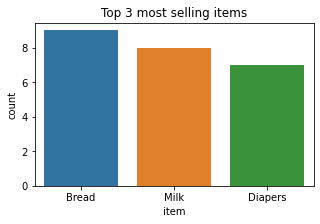

In [19]:
# Top N 아이템

plt.figure(figsize=(5,3))
order = transaction_df['item'].value_counts()[:3].index
sns.countplot(x = 'item', data = transaction_df, order = order)
plt.title('Top 3 most selling items')
plt.show()

In [20]:
# mlxtend 라이브러리 학습을 위한 데이터 포맷 변경

from mlxtend.preprocessing import TransactionEncoder

dataset = []

# 2개 이상의 item으로 이루어진 itemset만 사용한다.
for transaction, df in transaction_df.groupby('transaction'):
  item_list = list(df['item'].unique())
  if len(item_list) > 1:
    dataset.append(item_list)

dataset

[['Bread', 'Milk'],
 ['Bread', 'Diapers', 'Beer', 'Eggs'],
 ['Milk', 'Diapers', 'Beer', 'Cola'],
 ['Bread', 'Milk', 'Diapers', 'Beer'],
 ['Bread', 'Milk', 'Diapers', 'Cola'],
 ['Bread', 'Milk'],
 ['Bread', 'Cola', 'Beer', 'Milk'],
 ['Milk', 'Bread', 'Beer', 'Cola'],
 ['Bread', 'Milk', 'Diapers', 'Beer'],
 ['Bread', 'Beer', 'Diapers']]

In [21]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Beer,Bread,Cola,Diapers,Eggs,Milk
0,False,True,False,False,False,True
1,True,True,False,True,True,False
2,True,False,True,True,False,True
3,True,True,False,True,False,True
4,False,True,True,True,False,True
5,False,True,False,False,False,True
6,True,True,True,False,False,True
7,True,True,True,False,False,True
8,True,True,False,True,False,True
9,True,True,False,True,False,False


In [22]:
# frequent itemset 생성

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df, min_support = 0.2, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.7,(Beer)
1,0.9,(Bread)
2,0.4,(Cola)
3,0.6,(Diapers)
4,0.8,(Milk)
5,0.6,"(Bread, Beer)"
6,0.3,"(Cola, Beer)"
7,0.5,"(Beer, Diapers)"
8,0.5,"(Beer, Milk)"
9,0.3,"(Cola, Bread)"


In [23]:
# minimum confidence 이상의 association rule 생성 및 추천

result = association_rules(frequent_itemsets, metric = "confidence", min_threshold=0.3)
result[(result['antecedents'] == frozenset(['Beer']))].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Beer),(Diapers),0.7,0.6,0.5,0.714286,1.190476,0.08,1.400000
28,(Beer),"(Bread, Diapers)",0.7,0.5,0.4,0.571429,1.142857,0.05,1.166667
3,(Beer),(Cola),0.7,0.4,0.3,0.428571,1.071429,0.02,1.050000
40,(Beer),"(Cola, Milk)",0.7,0.4,0.3,0.428571,1.071429,0.02,1.050000
46,(Beer),"(Diapers, Milk)",0.7,0.4,0.3,0.428571,1.071429,0.02,1.050000
1,(Beer),(Bread),0.7,0.9,0.6,0.857143,0.952381,-0.03,0.700000
6,(Beer),(Milk),0.7,0.8,0.5,0.714286,0.892857,-0.06,0.700000
34,(Beer),"(Bread, Milk)",0.7,0.7,0.4,0.571429,0.816327,-0.09,0.700000


In [24]:
# minimum lift 이상의 association rule 생성 및 추천
# 보통은 위와 같이 minimum confidence로 rule을 cutoff 하고 lift로 정렬하여 사용함.

result = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.1)
result[(result['antecedents'] == frozenset(['Beer']))].sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Beer),(Diapers),0.7,0.6,0.5,0.714286,1.190476,0.08,1.400000
6,(Beer),"(Bread, Diapers)",0.7,0.5,0.4,0.571429,1.142857,0.05,1.166667


## Online Retail 데이터를 활용한 연관규칙 생성
- 실제 데이터를 사용해서 간단한 연관 규칙 기반 상품 추천 시스템을 만들어보자.

### 데이터 Preprocessing

In [25]:
!wc -l ../data/online_retail.csv

  541909 ../data/online_retail.csv


In [26]:
!head ../data/online_retail.csv

In [27]:
# file_path = '/content/drive/MyDrive/data/online_retail/online_retail.csv'
file_path = '../data/online_retail.csv'
parse_date = lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M')
retail_df = pd.read_csv(file_path, encoding="utf-8", parse_dates = ['InvoiceDate'], date_parser = parse_date)

In [28]:
# quantity가 음수인 데이터는 제거
retail_df = retail_df[retail_df.Quantity > 0]

In [29]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [30]:
# 아이템 총 개수
print(retail_df['StockCode'].nunique())

3941


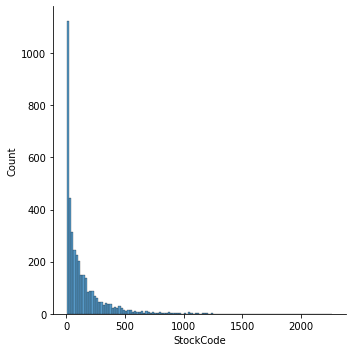

In [31]:
# 아이템 별 트랜잭션 등장 수 분포
sns.displot(retail_df['StockCode'].value_counts())

In [32]:
# 현재 주어진 로그의 경우, 단일 아이템 하나당 하나의 로그가 남는다. 그래서 트랜잭션 단위로 묶어보자.
transaction_df = pd.DataFrame({
    "items": retail_df.groupby(['InvoiceNo'])['StockCode'].apply(set),
    "item_length": retail_df.groupby(['InvoiceNo'])['StockCode'].nunique()
}).reset_index()
transaction_df

,InvoiceNo,items,item_length
0,536365,"{85123A, 22752, 84029G, 84406B, 84029E, 21730,...",7
1,536366,"{22632, 22633}",2
2,536367,"{22622, 21754, 22623, 84969, 22749, 84879, 217...",12
3,536368,"{22960, 22913, 22914, 22912}",4
4,536369,{21756},1
...,...,...,...
20723,581586,"{20685, 23275, 21217, 22061}",4
20724,581587,"{23256, 23254, 22556, 22730, 22629, 22367, 228...",15
20725,A563185,{B},1
20726,A563186,{B},1


In [33]:
transaction_df[transaction_df.item_length > 1]

,InvoiceNo,items,item_length
0,536365,"{85123A, 22752, 84029G, 84406B, 84029E, 21730,...",7
1,536366,"{22632, 22633}",2
2,536367,"{22622, 21754, 22623, 84969, 22749, 84879, 217...",12
3,536368,"{22960, 22913, 22914, 22912}",4
5,536370,"{22661, 21791, 22900, 22726, 22728, 21731, 217...",20
...,...,...,...
20720,581583,"{85038, 20725}",2
20721,581584,"{85038, 20832}",2
20722,581585,"{22460, 22398, 22178, 84832, 84945, 22726, 231...",21
20723,581586,"{20685, 23275, 21217, 22061}",4


### frequent itemset 생성

In [34]:
# frequent itemset, rule generation을 위한 데이터 변환

from mlxtend.preprocessing import TransactionEncoder

dataset = []

# 2개 이상의 item으로 이루어진 itemset만 사용한다.
for index, row in transaction_df[transaction_df.item_length > 1].reset_index().iterrows():
    dataset.append(list(row['items']))

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,DOT,M,PADS,POST,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,m
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18333,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18334,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
%%time

min_support = 0.01

frequent_itemsets = apriori(df, min_support = min_support, use_colnames = True)
# frequent_itemsets = fpgrowth(df, min_support = min_support, use_colnames = True)

CPU times: user 2min 23s, sys: 44 s, total: 3min 7s
Wall time: 3min 15s


In [36]:
%%time

min_support = 0.01

# frequent_itemsets = apriori(df, min_support = min_support, use_colnames = True)
frequent_itemsets = fpgrowth(df, min_support = min_support, use_colnames = True)

CPU times: user 7.52 s, sys: 50.9 ms, total: 7.57 s
Wall time: 7.58 s


### association rule 생성 및 상품 추천

In [37]:
# 높은 support를 가진 아이템 가운데 하나를 선택해서 추천해보자.
frequent_itemsets.sort_values(by='support', ascending=False)

,support,itemsets
0,0.119042,(85123A)
98,0.113317,(85099B)
328,0.107264,(22423)
653,0.091122,(47566)
42,0.085287,(20725)
...,...,...
1215,0.010034,"(22379, 22666)"
2259,0.010034,"(85099B, 23182)"
2079,0.010034,"(22666, 85099B, DOT)"
1153,0.010034,"(21559, 85099B)"


In [38]:
# itemset [85099B] 이 주어졌을 때 가장 연관도가 높은 아이템 10개를 추천받는다면,
min_confidence = 0.2
k = 10

given_itemset = ['85099B']
result = association_rules(frequent_itemsets, metric = "confidence", min_threshold = min_confidence)
result[(result['antecedents'] == frozenset(given_itemset))].sort_values(by='lift', ascending = False)[:k]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2870,(85099B),(DOT),0.113317,0.038608,0.026448,0.233397,6.045259,0.022073,1.254094
156,(85099B),(22386),0.113317,0.066310,0.044989,0.397016,5.987242,0.037474,1.548449
2321,(85099B),(21928),0.113317,0.043898,0.029502,0.260346,5.930725,0.024527,1.292635
1610,(85099B),(85099F),0.113317,0.044443,0.029283,0.258422,5.814644,0.024247,1.288544
212,(85099B),(85099C),0.113317,0.050551,0.031901,0.281521,5.569068,0.026173,1.321471
3335,(85099B),(22385),0.113317,0.037463,0.023449,0.206930,5.523548,0.019203,1.213684
2037,(85099B),(20712),0.113317,0.047006,0.029174,0.257459,5.477129,0.023848,1.283423
179,(85099B),(21931),0.113317,0.064565,0.039481,0.348412,5.396265,0.032165,1.435623
305,(85099B),(21929),0.113317,0.047170,0.028247,0.249278,5.284697,0.022902,1.269219
665,(85099B),(22411),0.113317,0.064020,0.037081,0.327238,5.111487,0.029827,1.391249


## AssociationRuleMining Class

In [39]:
# 정리된 class 형태로 만들어보자.

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

class AssociationRuleMining(object):
    
    def __init__(self, min_supp, min_conf):
        """ Parameters setting
        """
        self.min_supp = min_supp  # min support (used for mining frequent itemsets)
        self.min_conf = min_conf  # min confidence (used for mining association rules)

    def fit(self, dataset, algo):
        """ Run the apriori/fpgrowth algorithm, return the frequent k-term sets and association rules. 
        """
        
        te = TransactionEncoder()
        te_ary = te.fit(dataset).transform(dataset)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        
        if algo == 'apriori':
            self.frequent_itemsets = apriori(df, min_support = self.min_supp, use_colnames = True)
        elif algo == 'fpgrowth':
            self.frequent_itemsets = fpgrowth(df, min_support = self.min_supp, use_colnames = True)
        else:
            raise Exception('A wrong algorithm name')
        
        self.result = association_rules(frequent_itemsets, metric = "confidence", min_threshold = self.min_conf)
    
    def get_available_recommend_items(self):
        """ Get 1-freq item lists greater than minimum support 
        """
        tmp_df = self.result
        return [list(x)[0] for x in tmp_df[tmp_df['antecedents'].str.len() == 1]['antecedents'].unique().tolist()]
        
    
    def recommend_item(self, item_id, min_conf = None):
        """ Get 1-freq recommend item list sorted by lift, greater than minimum confidence 
        """
        if min_conf is None:
            tmp_df = self.result
        else:
            tmp_df = association_rules(frequent_itemsets, metric = "confidence", min_threshold = min_conf)
        
        tmp_df = tmp_df[(tmp_df['antecedents'] == frozenset([item_id])) & \
                        (tmp_df['consequents'].str.len() == 1)].sort_values(by='lift', ascending = False)
        
        return tmp_df[['consequents', 'confidence', 'lift']]
    
    def get_suppport(self, items):
        """ Get support from item list
        """
        tmp_df = self.frequent_itemsets
        return tmp_df[tmp_df['itemsets'] == frozenset(items)]['support'].values[0]
        

In [40]:
objARM = AssociationRuleMining(min_supp = 0.01, min_conf = 0.01)
objARM.fit(dataset, 'fpgrowth')

In [41]:
objARM.result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22865),(22633),0.035609,0.026066,0.012869,0.361409,13.865096,0.011941,1.525129
1,(22633),(22865),0.026066,0.035609,0.012869,0.493724,13.865096,0.011941,1.904871
2,(22633),(22866),0.026066,0.029829,0.011724,0.449791,15.079093,0.010947,1.763277
3,(22866),(22633),0.029829,0.026066,0.011724,0.393053,15.079093,0.010947,1.604644
4,(22867),(22633),0.030210,0.026066,0.010088,0.333935,12.811089,0.009301,1.462221
...,...,...,...,...,...,...,...,...,...
5635,(22633),(23439),0.026066,0.021649,0.010361,0.397490,18.360613,0.009797,1.623791
5636,(22865),(23439),0.035609,0.021649,0.011888,0.333844,15.420724,0.011117,1.468651
5637,(23439),(22865),0.021649,0.035609,0.011888,0.549118,15.420724,0.011117,2.138900
5638,(23439),(22866),0.021649,0.029829,0.010852,0.501259,16.804563,0.010206,1.945242


### class method를 활용하여 연관분석 추천 제공

In [42]:
# minimum support를 만족하는 상품, 즉 frequent itemset에 존재하는 상품이어야 연관분석이 가능하다.

recommend_list = objARM.get_available_recommend_items()
recommend_list[:20]

['22865',
 '22633',
 '22866',
 '22867',
 '22632',
 '85123A',
 '84879',
 '22423',
 '47566',
 '21754',
 '21755',
 '22748',
 '22745',
 '22960',
 '22961',
 '85099B',
 '22197',
 '21212',
 '22457',
 '20725']

In [43]:
# support가 상대적으로 높은 item의 경우 association rule이 많다.

item_id = '85099B'
print('support: ', objARM.get_suppport([item_id]))
objARM.recommend_item(item_id)

support:  0.11331661031737376


,consequents,confidence,lift
3836,(DOT),0.233397,6.045259
244,(22386),0.397016,5.987242
3137,(21928),0.260346,5.930725
2218,(85099F),0.258422,5.814644
3332,(20711),0.165544,5.804478
...,...,...,...
5181,(23298),0.107315,1.721730
5519,(23084),0.089509,1.699191
1225,(85123A),0.192974,1.621052
951,(22086),0.100577,1.599644


In [44]:
# association rule이 많은 경우에 minimum confidence 값을 높게 잡기도 한다.
objARM.recommend_item(item_id, min_conf=0.3)

,consequents,confidence,lift
74,(22386),0.397016,5.987242
86,(21931),0.348412,5.396265
429,(22411),0.327238,5.111487


In [45]:
# support가 상대적으로 낮은 item의 경우 association rule이 적다.

item_id = '20713'
print('support: ', objARM.get_suppport([item_id]))
objARM.recommend_item(item_id)

support:  0.03544552295779256


,consequents,confidence,lift
2304,(DOT),0.383077,9.922125
2288,(20712),0.433846,9.229548
2306,(22385),0.303077,8.089992
2296,(21928),0.350769,7.990567
2300,(21930),0.304615,7.957318
2294,(85099C),0.395385,7.821535
2284,(21931),0.490769,7.601120
2298,(22379),0.306154,7.515729
2286,(85099F),0.303077,6.819417
2290,(22386),0.430769,6.496255
